In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import json
import os

%matplotlib inline

In [6]:
executions_df = pd.read_json('agm_data.json')

In [26]:
def get_times_for_execution(index, call_type):
    """ call_type values can be 'list', 'detail', 'head' """
    timestamp = executions_df.time[index]
    version = executions_df.version[index]
    ipaddress = executions_df.ipaddress[index]
    endpoints = [item['endpoint'] for item in executions_df.tests[index][call_type]]
    exec_li = executions_df.tests[index][call_type]
    # We may change the amount of iterations, in which case if there is any non-uniformity in iterations across
    # executions, we will get an index error
    iterations_count = len(exec_li[0]['times'])
    
    times_li = list()
    for endpoint_i, endpoint in enumerate(endpoints):
        for i in range(0, iterations_count):
            time = exec_li[endpoint_i]['times'][i]
            current_iter = {'timestamp': timestamp, 'version': version, 'endpoint': endpoint,
                            'time': time, 'ipaddress': ipaddress, 'call_type': call_type}
            times_li.append(current_iter)
    return pd.DataFrame(times_li)
        
def get_times_for_all_executions(call_type):
    total_executions = len(executions_df.tests)
    execution_dfs = list()
    for i in range(0, total_executions):
        execution_dfs.append(get_times_for_execution(i, call_type))
    return pd.concat(execution_dfs).reset_index(drop=True)

In [27]:
def combine():
    combo = [get_times_for_all_executions('list'), get_times_for_all_executions('detail'), get_times_for_all_executions('head')]
    combo = pd.concat(combo)
    return combo.reset_index(drop=True)

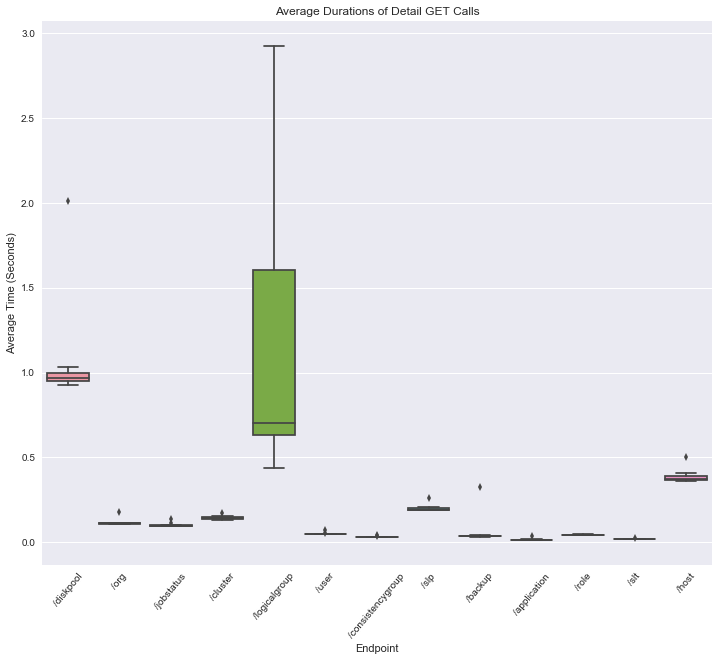

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
detail_df = get_times_for_all_executions('detail')
sns.boxplot(x="endpoint", y="time", data=detail_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(detail_df.endpoint), rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Average Durations of Detail GET Calls')

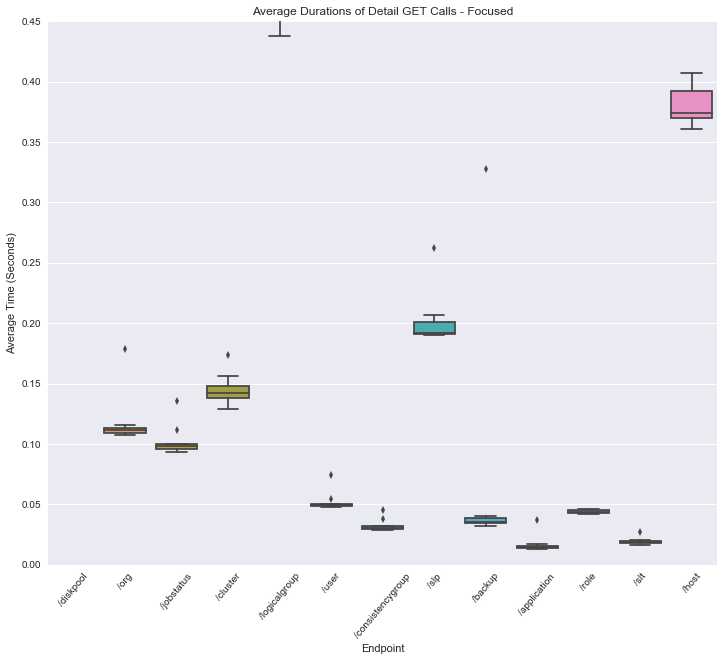

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
detail_df = get_times_for_all_executions('detail')
sns.boxplot(x="endpoint", y="time", data=detail_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(detail_df.endpoint), rotation=50)
_ = plt.ylim(0, 0.45)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Average Durations of Detail GET Calls - Focused')

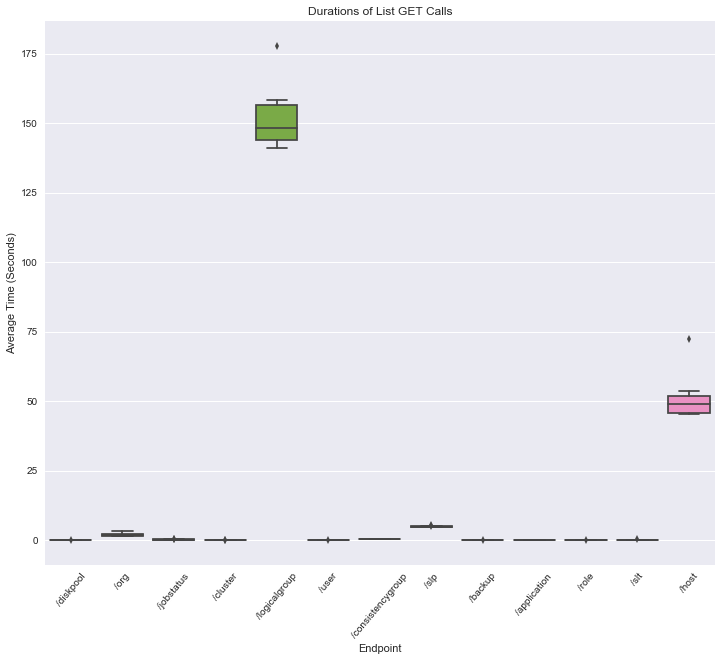

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
list_df = get_times_for_all_executions('list')
sns.boxplot(x="endpoint", y="time", data=list_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(list_df.endpoint), rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of List GET Calls')

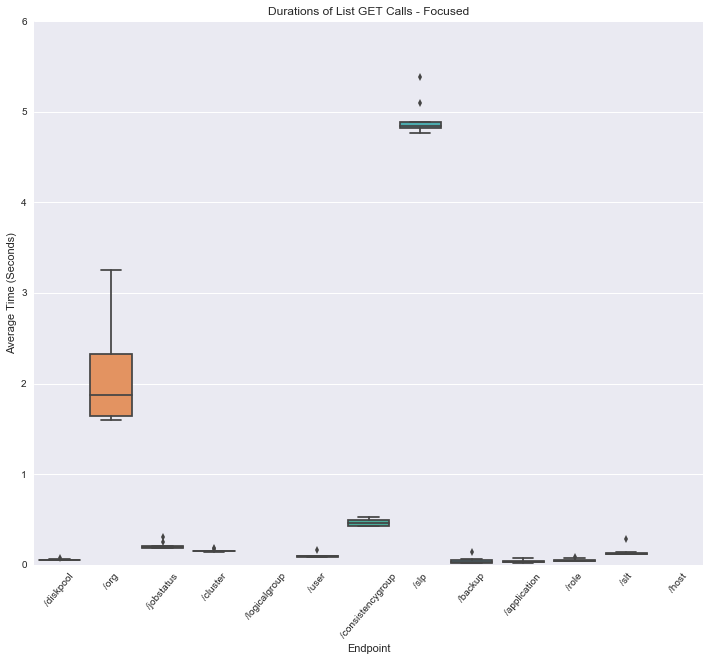

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
list_df = get_times_for_all_executions('list')
sns.boxplot(x="endpoint", y="time", data=list_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.ylim(0, 6)
_ = ax.set_xticklabels(set(list_df.endpoint), rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of List GET Calls - Focused')

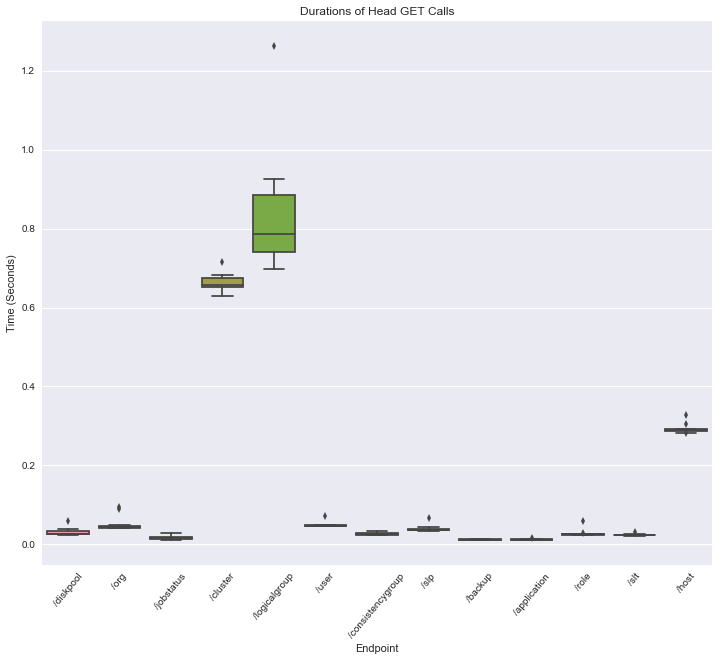

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
head_df = get_times_for_all_executions('head')
sns.boxplot(x="endpoint", y="time", data=head_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(head_df.endpoint), rotation=50)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of Head GET Calls')

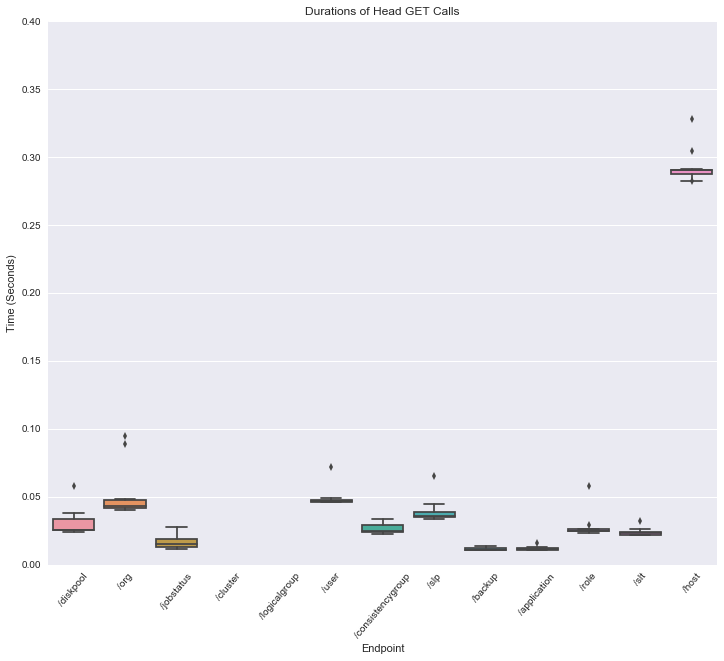

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
head_df = get_times_for_all_executions('head')
sns.boxplot(x="endpoint", y="time", data=head_df)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(head_df.endpoint), rotation=50)
_ = plt.ylim(0, 0.4)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of Head GET Calls')

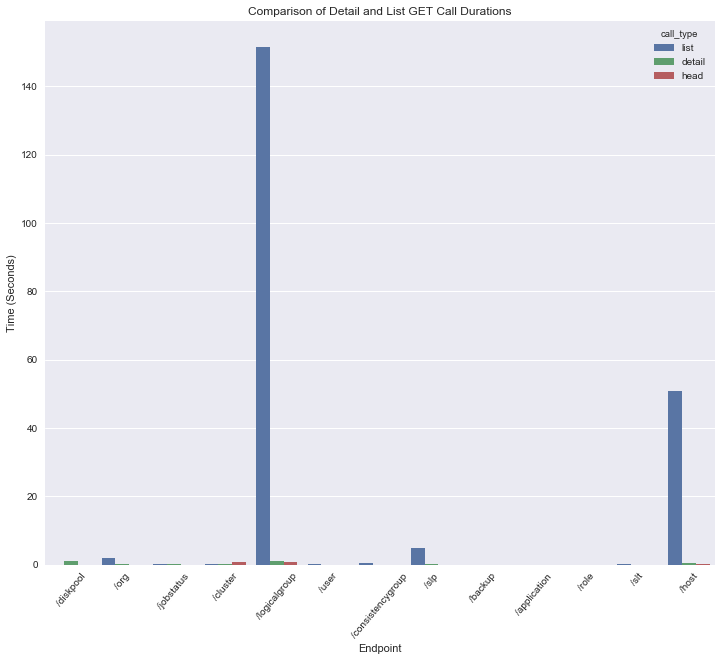

In [34]:
#Changes the figure size of the output graph
full_df = combine()
fig, ax = plt.subplots(figsize=(12, 10))
g = sns.barplot(x="endpoint", y="time", hue="call_type", data=full_df, ci=None)
#Limits the y axis to make the details of more bar graphs relevent
#plt.ylim(0, 2)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(full_df.endpoint), rotation=50)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Comparison of Detail and List GET Call Durations')

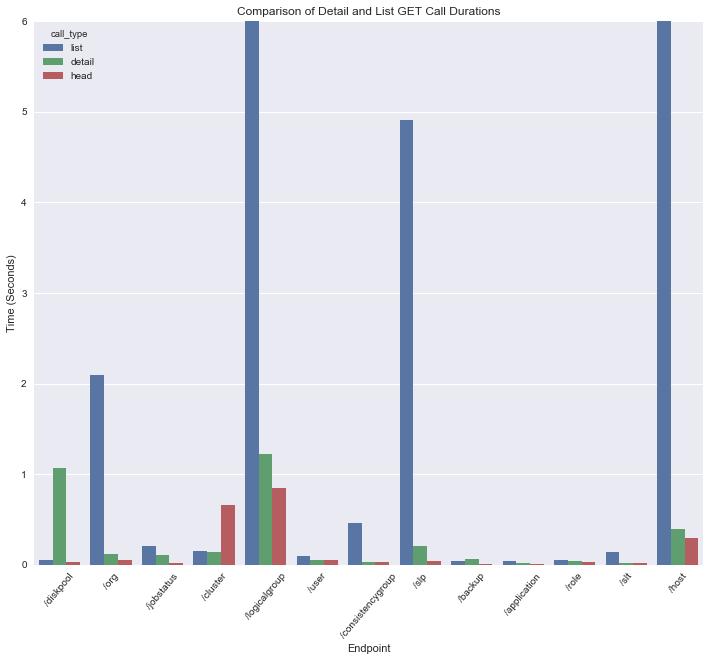

In [35]:
#Changes the figure size of the output graph
full_df = combine()
fig, ax = plt.subplots(figsize=(12, 10))
g = sns.barplot(x="endpoint", y="time", hue="call_type", data=full_df, ci=None)
#Limits the y axis to make the details of more bar graphs relevent
#plt.ylim(0, 2)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(full_df.endpoint), rotation=50)
_ = plt.ylim(0, 6)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Comparison of Detail and List GET Call Durations')

In [36]:
#This is the command to convert agm_api_calls.ipynb to a pdf with the hidecode template
#jupyter nbconvert --to pdf agm_api_calls.ipynb --template hidecode.tpl

#You will definitely need latex of some kind
#Maybe pandocs?